# ML Project

## Prepare

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix
import joblib

In [2]:
# Load dataset
df = pd.read_csv("dataset/HomeC.csv")  # Change filename if needed

C:\Users\sunsu\AppData\Local\Temp\ipykernel_31556\489979449.py:2: DtypeWarning: Columns (0,27) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("dataset/HomeC.csv")  # Change filename if needed


In [3]:
df

,time,use [kW],gen [kW],House overall [kW],Dishwasher [kW],Furnace 1 [kW],Furnace 2 [kW],Home office [kW],Fridge [kW],Wine cellar [kW],...,visibility,summary,apparentTemperature,pressure,windSpeed,cloudCover,windBearing,precipIntensity,dewPoint,precipProbability
0,1451624400,0.932833,0.003483,0.932833,0.000033,0.020700,0.061917,0.442633,0.124150,0.006983,...,10.00,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0000,24.40,0.00
1,1451624401,0.934333,0.003467,0.934333,0.000000,0.020717,0.063817,0.444067,0.124000,0.006983,...,10.00,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0000,24.40,0.00
2,1451624402,0.931817,0.003467,0.931817,0.000017,0.020700,0.062317,0.446067,0.123533,0.006983,...,10.00,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0000,24.40,0.00
3,1451624403,1.022050,0.003483,1.022050,0.000017,0.106900,0.068517,0.446583,0.123133,0.006983,...,10.00,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0000,24.40,0.00
4,1451624404,1.139400,0.003467,1.139400,0.000133,0.236933,0.063983,0.446533,0.122850,0.006850,...,10.00,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0000,24.40,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
503906,1452128306,1.599333,0.003233,1.599333,0.000050,0.104017,0.625033,0.041750,0.005233,0.008433,...,8.74,Light Rain,29.45,1011.49,6.72,0.31,186.0,0.0101,31.27,0.51
503907,1452128307,1.924267,0.003217,1.924267,0.000033,0.422383,0.637733,0.042033,0.004983,0.008467,...,8.74,Light Rain,29.45,1011.49,6.72,0.31,186.0,0.0101,31.27,0.51
503908,1452128308,1.978200,0.003217,1.978200,0.000050,0.495667,0.620367,0.042100,0.005333,0.008233,...,8.74,Light Rain,29.45,1011.49,6.72,0.31,186.0,0.0101,31.27,0.51
503909,1452128309,1.990950,0.003233,1.990950,0.000050,0.494700,0.634133,0.042100,0.004917,0.008133,...,8.74,Light Rain,29.45,1011.49,6.72,0.31,186.0,0.0101,31.27,0.51


In [4]:
# Calculate moving average and standard deviation over a 60-second window
df['moving_average'] = df['House overall [kW]'].rolling(window=60).mean()
df['std_dev'] = df['House overall [kW]'].rolling(window=60).std()

# Define upper and lower thresholds
df['upper_threshold'] = df['moving_average'] + (2 * df['std_dev'])
df['lower_threshold'] = df['moving_average'] - (2 * df['std_dev'])

# Initialize the anomaly flag
df['anomaly_flag'] = 0

In [5]:
# Flag anomalies
df.loc[df['House overall [kW]'] > df['upper_threshold'], 'anomaly_flag'] = 1
df.loc[df['House overall [kW]'] < df['lower_threshold'], 'anomaly_flag'] = 1

In [6]:
# Handle missing values
cloud_cover_index = df[df['cloudCover'] == "cloudCover"].index
df.drop(cloud_cover_index, inplace=True)
df['cloudCover'] = df['cloudCover'].astype(float)
df

,time,use [kW],gen [kW],House overall [kW],Dishwasher [kW],Furnace 1 [kW],Furnace 2 [kW],Home office [kW],Fridge [kW],Wine cellar [kW],...,cloudCover,windBearing,precipIntensity,dewPoint,precipProbability,moving_average,std_dev,upper_threshold,lower_threshold,anomaly_flag
58,1451624458,0.714200,0.003417,0.714200,0.000033,0.021083,0.309983,0.043067,0.005167,0.123317,...,0.75,285.0,0.0000,23.90,0.00,NaN,NaN,NaN,NaN,0
59,1451624459,0.497067,0.003417,0.497067,0.000017,0.096983,0.062867,0.043283,0.005000,0.123283,...,0.75,285.0,0.0000,23.90,0.00,1.044130,0.443877,1.931884,0.156375,0
60,1451624460,0.465133,0.003450,0.465133,0.000017,0.064500,0.062633,0.043250,0.005017,0.123350,...,0.75,285.0,0.0000,23.90,0.00,1.036335,0.449930,1.936195,0.136474,0
61,1451624461,0.512933,0.003417,0.512933,0.000017,0.111333,0.063883,0.043300,0.004967,0.123867,...,0.75,285.0,0.0000,23.90,0.00,1.029311,0.454812,1.938936,0.119687,0
62,1451624462,0.651283,0.003417,0.651283,0.000017,0.114583,0.063200,0.043283,0.114167,0.124267,...,0.75,285.0,0.0000,23.90,0.00,1.024636,0.457267,1.939169,0.110103,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
503906,1452128306,1.599333,0.003233,1.599333,0.000050,0.104017,0.625033,0.041750,0.005233,0.008433,...,0.31,186.0,0.0101,31.27,0.51,1.439551,0.518371,2.476293,0.402810,0
503907,1452128307,1.924267,0.003217,1.924267,0.000033,0.422383,0.637733,0.042033,0.004983,0.008467,...,0.31,186.0,0.0101,31.27,0.51,1.446714,0.522099,2.490911,0.402516,0
503908,1452128308,1.978200,0.003217,1.978200,0.000050,0.495667,0.620367,0.042100,0.005333,0.008233,...,0.31,186.0,0.0101,31.27,0.51,1.454722,0.526560,2.507842,0.401602,0
503909,1452128309,1.990950,0.003233,1.990950,0.000050,0.494700,0.634133,0.042100,0.004917,0.008133,...,0.31,186.0,0.0101,31.27,0.51,1.467884,0.529975,2.527835,0.407934,0


In [7]:
# Drop rows with NaN values
df.dropna(inplace=True)

In [8]:
df

,time,use [kW],gen [kW],House overall [kW],Dishwasher [kW],Furnace 1 [kW],Furnace 2 [kW],Home office [kW],Fridge [kW],Wine cellar [kW],...,cloudCover,windBearing,precipIntensity,dewPoint,precipProbability,moving_average,std_dev,upper_threshold,lower_threshold,anomaly_flag
59,1451624459,0.497067,0.003417,0.497067,0.000017,0.096983,0.062867,0.043283,0.005000,0.123283,...,0.75,285.0,0.0000,23.90,0.00,1.044130,0.443877,1.931884,0.156375,0
60,1451624460,0.465133,0.003450,0.465133,0.000017,0.064500,0.062633,0.043250,0.005017,0.123350,...,0.75,285.0,0.0000,23.90,0.00,1.036335,0.449930,1.936195,0.136474,0
61,1451624461,0.512933,0.003417,0.512933,0.000017,0.111333,0.063883,0.043300,0.004967,0.123867,...,0.75,285.0,0.0000,23.90,0.00,1.029311,0.454812,1.938936,0.119687,0
62,1451624462,0.651283,0.003417,0.651283,0.000017,0.114583,0.063200,0.043283,0.114167,0.124267,...,0.75,285.0,0.0000,23.90,0.00,1.024636,0.457267,1.939169,0.110103,0
63,1451624463,0.710450,0.003433,0.710450,0.000050,0.142050,0.062783,0.043283,0.140700,0.124317,...,0.75,285.0,0.0000,23.90,0.00,1.019443,0.459062,1.937567,0.101318,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
503905,1452128305,1.601233,0.003183,1.601233,0.000050,0.085267,0.642417,0.041783,0.005267,0.008667,...,0.31,186.0,0.0101,31.27,0.51,1.438614,0.518128,2.474869,0.402359,0
503906,1452128306,1.599333,0.003233,1.599333,0.000050,0.104017,0.625033,0.041750,0.005233,0.008433,...,0.31,186.0,0.0101,31.27,0.51,1.439551,0.518371,2.476293,0.402810,0
503907,1452128307,1.924267,0.003217,1.924267,0.000033,0.422383,0.637733,0.042033,0.004983,0.008467,...,0.31,186.0,0.0101,31.27,0.51,1.446714,0.522099,2.490911,0.402516,0
503908,1452128308,1.978200,0.003217,1.978200,0.000050,0.495667,0.620367,0.042100,0.005333,0.008233,...,0.31,186.0,0.0101,31.27,0.51,1.454722,0.526560,2.507842,0.401602,0


In [9]:
# Select features and target variable
# X = df[['use [kW]', 'gen [kW]', 'Dishwasher [kW]', 'Furnace 1 [kW]', 'Furnace 2 [kW]',
#         'Home office [kW]', 'Fridge [kW]', 'Wine cellar [kW]', 'Garage door [kW]',
#         'Kitchen 12 [kW]', 'Kitchen 14 [kW]', 'Kitchen 38 [kW]', 'Barn [kW]',
#         'Well [kW]', 'Microwave [kW]', 'Living room [kW]', 'Solar [kW]',
#         'temperature', 'humidity', 'pressure', 'windSpeed', 'cloudCover']]
X = df[['use [kW]', 'temperature', 'humidity', 'pressure', 'windSpeed', 'cloudCover']]
y = df['anomaly_flag']

In [10]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [11]:
# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Classification

In [12]:
from sklearn.metrics import (classification_report, confusion_matrix, accuracy_score,
                             precision_score, recall_score, roc_curve, auc)


def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)

    # Confusion Matrix
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Accuracy
    accuracy = accuracy_score(y_test, y_pred)

    # Precision
    precision = precision_score(y_test, y_pred)

    # Sensitivity (Recall)
    sensitivity = recall_score(y_test, y_pred)

    # Specificity (True Negative Rate)
    specificity = conf_matrix[0, 0] / (conf_matrix[0, 0] + conf_matrix[0, 1])

    # F1 Score
    f1 = 2 * (precision * sensitivity) / (precision + sensitivity)

    # ROC & AUC
    decision_function = model.decision_function(X_test)
    fpr, tpr, _ = roc_curve(y_test, decision_function)
    # fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
    roc_auc = auc(fpr, tpr)

    # Print evaluation metrics
    print("Confusion Matrix:\n", conf_matrix)
    print("Accuracy: {:.4f}".format(accuracy))
    print("Precision: {:.4f}".format(precision))
    print("Sensitivity (Recall): {:.4f}".format(sensitivity))
    print("Specificity: {:.4f}".format(specificity))
    print("F1 Score: {:.4f}".format(f1))
    print("AUC: {:.4f}".format(roc_auc))

    # Plot ROC curve
    plt.figure()
    plt.plot(fpr, tpr, color='blue', lw=2,
             label='ROC Curve (area = {:.2f})'.format(roc_auc))
    plt.plot([0, 1], [0, 1], color='red', lw=2,
             linestyle='--')  # Diagonal line
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc='lower right')
    plt.show()

### Logistic Regression

#### Scratch

In [13]:
class LogisticRegressionScratchMSE:
    def __init__(self, learning_rate=0.01, num_iterations=1000):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.w = None
        self.b = None

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def predict(self, X):
        z = np.dot(X, self.w) + self.b
        probs = sigmoid(z)

        # Return the class with the highest probability
        return np.where(probs >= 0.5, 1, 0)

    def initialize_weights(self, n_features):
        # Init with the same column number as feature
        self.w = np.zeros((n_features, 1))
        self.b = 0

    def cost_function(self, h, y):
        m = len(y)
        # reg_term = (0.01 / (2 * m)) * np.sum(self.w ** 2)
        cost = (1/m) * np.sum((h - y)**2)

        return cost  # + reg_term

    def fit(self, X, y):
        X = np.array(X)
        y = np.array(y).reshape(-1, 1)  # Ensure y is a column vector
        print(X.shape, y.shape)
        m = len(y)
        n_features = X.shape[1]
        self.initialize_weights(n_features)

        for i in range(self.num_iterations):
            # Forward prop
            probs = self.predict(X)

            # Cost
            # error = -(1 / m) * np.sum(y * np.log(probs + 1e-8) + (1 - y) * np.log(1 - probs + 1e-8))
            error = self.cost_function(probs, y)

            # Calculate the gradient of the error with respect to the weights
            gradient_w = (1 / m) * np.dot(X.T, (probs - y))
            gradient_b = (1 / m) * np.sum(probs - y)

            # Update the weights using the gradient and the learning rate
            self.w -= self.learning_rate * gradient_w
            self.b -= self.learning_rate * gradient_b

            # cost compute if more iteration (optional)
            if i % 100 == 0:
                print(f"Iteration {i}, Cost: {error}")

#### Scikit

In [15]:
# 1. Logistic Regression
log_model = LogisticRegression()
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)
print("Logistic Regression Report:\n",
      classification_report(y_test, y_pred_log))
joblib.dump(log_model, "models/logisitic_regression_model.pkl")

Logistic Regression Report:
               precision    recall  f1-score   support

           0       0.92      1.00      0.96     92657
           1       0.24      0.01      0.02      8114

    accuracy                           0.92    100771
   macro avg       0.58      0.50      0.49    100771
weighted avg       0.86      0.92      0.88    100771



['models/logisitic_regression_model.pkl']

Confusion Matrix:
 [[92431   226]
 [ 8044    70]]
Accuracy: 0.9179
Precision: 0.2365
Sensitivity (Recall): 0.0086
Specificity: 0.9976
F1 Score: 0.0166
AUC: 0.6870


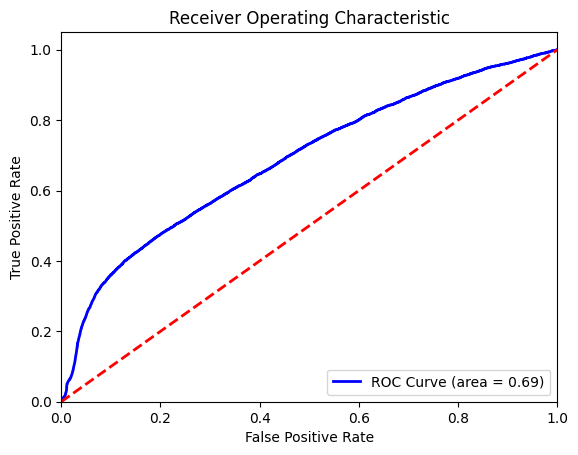

In [16]:
evaluate_model(log_model, X_test, y_test)

### Decision Tree

#### Scratch

In [16]:
class DecisionNode:
    def __init__(self, impurity=None, feature_index=None, threshold=None, left=None, right=None):
        self.left = left
        self.right = right
        # The largest impurity value of this node
        self.impurity = impurity
        # Index of the feature which make the best fit for this node.
        self.feature_index = feature_index
        # The threshold value for that feature to make the split.
        self.threshold = threshold


class LeafNode:
    def __init__(self, value):
        self.prediction_value = value


class DecisionTreeClassifierFromScratch:
    def __init__(self, min_sample_split=3, min_impurity=1e-7, max_depth=10, criterion='gini'):
        self.root = None
        self.min_sample_split = min_sample_split
        self.min_impurity = min_impurity
        self.max_depth = max_depth
        self.impurity_function = self._calculate_information_gain
        if criterion == 'entropy':
            self.criterion = self._entropy
            self.criterion_name = criterion
        else:
            self.criterion = self._gini_index
            self.criterion_name = 'gini'

    def _gini_index(self, y):
        gini = 1
        unique_value = np.unique(y)
        for val in unique_value:
            # probability of that class.
            p = np.sum(y == val) / len(y)
            gini += -np.square(p)
        return gini

    def _entropy(self, y):
        entropy = 0
        unique_value = np.unique(y)
        for val in unique_value:
            # probability of that class.
            p = np.sum(y == val) / len(y)
            entropy += -p * np.log2(p)
        return entropy

    def _calculate_information_gain(self, y, y1, y2):
        # :param y: target value.
        # :param y1: target value for dataset in the true split/right branch.
        # :param y2: target value for dataset in the false split/left branch.

        # propobility of true values.
        p = len(y1) / len(y)
        info_gain = self.criterion(
            y) - p * self.criterion(y1) - (1 - p) * self.criterion(y2)
        return info_gain

    def _leaf_value_calculation(self, y):
        most_frequent_label = None
        max_count = 0
        unique_labels = np.unique(y)
        # iterate over all the unique values and find their frequentcy count.
        for label in unique_labels:
            count = len(y[y == label])
            if count > max_count:
                most_frequent_label = label
                max_count = count
        return most_frequent_label

    def _partition_dataset(self, Xy, feature_index, threshold):
        col = Xy[:, feature_index]
        X_1 = Xy[col >= threshold]
        X_2 = Xy[col < threshold]

        return X_1, X_2

    def _find_best_split(self, Xy):
        best_question = tuple()
        best_datasplit = {}
        largest_impurity = 0
        n_features = (Xy.shape[1] - 1)
        # iterate over all the features.
        for feature_index in range(n_features):
            # find the unique values in that feature.
            unique_value = set(s for s in Xy[:, feature_index])
            # iterate over all the unique values to find the impurity.
            for threshold in unique_value:
                # split the dataset based on the feature value.
                true_xy, false_xy = self._partition_dataset(
                    Xy, feature_index, threshold)

                # skip the node which has any on type 0. because this means it is already pure.
                if len(true_xy) > 0 and len(false_xy) > 0:
                    # find the y values.
                    y = Xy[:, -1]
                    true_y = true_xy[:, -1]
                    false_y = false_xy[:, -1]
                    # calculate the impurity function.
                    impurity = self.impurity_function(y, true_y, false_y)

                    # if the calculated impurity is larger than save this value for comaparison (highest gain).
                    if impurity > largest_impurity:
                        largest_impurity = impurity
                        best_question = (feature_index, threshold)
                        best_datasplit = {
                            # X of left subtree
                            "leftX": true_xy[:, :n_features],
                            # y of left subtree
                            "lefty": true_xy[:, n_features:],
                            # X of right subtree
                            "rightX": false_xy[:, :n_features],
                            # y of right subtree
                            "righty": false_xy[:, n_features:]
                        }

        return largest_impurity, best_question, best_datasplit

    def _build_tree(self, X, y, current_depth=0):
        n_samples, n_features = X.shape
        # Add y as last column of X
        Xy = np.column_stack((X, y))
        # find the Information gain on each feature each values and return the question which splits the data very well
        if (n_samples >= self.min_sample_split) and (current_depth < self.max_depth):
            # find the best split/ which question split the data well.
            impurity, quesion, best_datasplit = self._find_best_split(Xy)
            if impurity > self.min_impurity:
                # Build subtrees for the right and left branch.
                true_branch = self._build_tree(
                    best_datasplit["leftX"], best_datasplit["lefty"], current_depth + 1)
                false_branch = self._build_tree(
                    best_datasplit["rightX"], best_datasplit["righty"], current_depth + 1)
                return DecisionNode(impurity=impurity, feature_index=quesion[0], threshold=quesion[1],
                                    left=true_branch, right=false_branch)

        leaf_value = self._leaf_value_calculation(y)
        return LeafNode(value=leaf_value)

    def fit(self, X, y):
        self.root = self._build_tree(X, y, current_depth=0)

    def predict_sample(self, x, tree=None):
        if isinstance(tree, LeafNode):
            return tree.prediction_value

        if tree is None:
            tree = self.root
        feature_value = x[tree.feature_index]
        branch = tree.right

        if isinstance(feature_value, int) or isinstance(feature_value, float):
            if feature_value >= tree.threshold:
                branch = tree.left
        elif feature_value == tree.threshold:
            branch = tree.left

        return self.predict_sample(x, branch)

    def predict(self, test_X):
        x = np.array(test_X)
        y_pred = [self.predict_sample(sample) for sample in x]
        y_pred = np.array(y_pred)
        return y_pred

    def draw_tree(self):
        self._draw_tree(self.root)

    def _draw_tree(self, tree=None, indentation=" ", depth=0):
        if isinstance(tree, LeafNode):
            print(indentation, "The predicted value -->", tree.prediction_value)
            return
        else:
            print(indentation, f"({depth}) Is {tree.feature_index}>={tree.threshold}?"
                  f": {self.criterion_name}:{tree.impurity:.2f}")
            if tree.left is not None:
                print(indentation + '----- True branch :)')
                self._draw_tree(tree.left, indentation + "  ", depth+1)
            if tree.right is not None:
                print(indentation + '----- False branch :)')
                self._draw_tree(tree.right, indentation + "  ", depth+1)

#### Scikit

In [17]:
# 2. Decision Tree
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)
y_pred_tree = tree_model.predict(X_test)
print("Decision Tree Report:\n", classification_report(y_test, y_pred_tree))
joblib.dump(tree_model, 'models/decision_tree_model.pkl')

Decision Tree Report:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97     92657
           1       0.65      0.63      0.64      8114

    accuracy                           0.94    100771
   macro avg       0.81      0.80      0.80    100771
weighted avg       0.94      0.94      0.94    100771



['models/decision_tree_model.pkl']

Confusion Matrix:
 [[89837  2820]
 [ 2977  5137]]
Accuracy: 0.9425
Precision: 0.6456
Sensitivity (Recall): 0.6331
Specificity: 0.9696
F1 Score: 0.6393
AUC: 0.8017


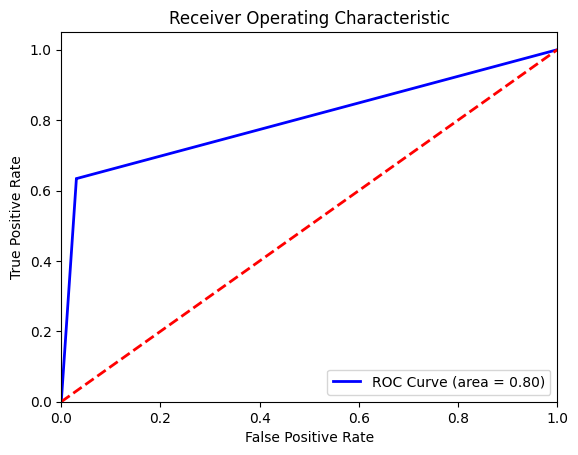

In [18]:
evaluate_model(tree_model, X_test, y_test)

#### Scikit

### SVC

#### Scratch

In [19]:
class SVM_Linear_Scratch:
    def __init__(self, C=1, batch_size=100, learning_rate=0.001, iterations=1000):
        # C = error term
        self.C = C
        self.batch_size = batch_size
        self.iterations = iterations
        self.learning_rate = learning_rate
        self.w = None
        self.b = None

    def decision_function(self, X):
        return np.dot(X, self.w) + self.b  # w.x + b

    def hingeloss(self, w, b, x, y):
        # Regularizer term
        reg = 0.5 * (w * w)

        for i in range(x.shape[0]):
            # Optimization term
            opt_term = y[i] * ((np.dot(w, x[i])) + b)
            loss = reg + self.C * max(0, 1 - opt_term)

        return loss[0]

    def fit(self, X, Y):
        # initialize
        n_samples = X.shape[0]
        n_features = X.shape[1]
        self.w = np.zeros(n_features)
        self.b = 0
        losses = []

        # convert y to signed value (-1, +1)
        Y = np.where(Y <= 0, -1, 1)

        # gradient descent optimization start
        for i in range(self.iterations):
            l = self.hingeloss(self.w, self.b, X, Y)
            losses.append(l)

            # iterate through samples with batch_size as interval
            for batch_start in range(0, n_samples, self.batch_size):
                gradw = 0
                gradb = 0
                for x in range(batch_start, batch_start + self.batch_size):
                    if x >= n_samples:
                        break
                     # correct classification
                    if Y[x] * self.decision_function(X[x]) >= 1:
                        gradw += 0  # w = w - α*w
                        gradb += 0  # b = b
                    # misclassification
                    else:
                        # w = w - α*(w - C*yi*xi)
                        gradw += self.C * Y[x] * X[x]
                        gradb += self.C * Y[x]  # b = b + α*(C*yi)

                # Updating weights and bias
                self.w = self.w - self.learning_rate * self.w + self.learning_rate * gradw
                self.b = self.b + self.learning_rate * gradb

        return self.w, self.b, losses

    def predict(self, X):
        prediction = self.decision_function(X)
        label_signs = np.sign(prediction)
        result = np.where(label_signs <= -1, 0, 1)
        return result

In [20]:
class SVM_Non_Linear_Scratch:
    def __init__(self, kernel='poly', C=1, degree=2, const=1, sigma=0.1, iterations=1000, learning_rate= 0.001):
        self.X = None
        self.y = None
        self.alpha = None
        self.ones = None
        self.b = 0
        self.C = C
        self.iterations = iterations
        self.learning_rate = learning_rate

        if kernel == 'poly':
            self.kernel = self.polynomial_kernel
            self.degree = degree
            self.const = const
        elif kernel == 'rbf':
            self.kernel =  self.gaussian_kernel
            self.sigma = sigma

    def polynomial_kernel(self, X, Z):
        # K(X, Z) = (c + X.Z)^degree
        return (self.const + X.dot(Z.T))**self.degree

    def gaussian_kernel(self, X, Z):
        # K(X, Z) = e^( -(1/ σ2) * ||X-Z||^2 )
        return np.exp(-(1 / self.sigma ** 2) * np.linalg.norm(X[:, np.newaxis] - Z[np.newaxis, :], axis=2) ** 2)

    def decision_function(self, X):
        # ŷ = sign( (αi*yi).K(xi, xi) + b )
        return (self.alpha * self.y).dot(self.kernel(self.X, X)) + self.b

    def fit(self, X, y):
        y = np.where(y <= 0, -1, 1)
        self.X = X
        self.y = y
        self.alpha = np.random.random(X.shape[0])
        self.ones = np.ones(X.shape[0])
        self.b = 0
        losses = []

        # (yi*yj) * K(xi, xj)
        kernel_mat = np.outer(y, y) * self.kernel(X, X)

        for i in range(self.iterations):
            # 1 – yk * ∑( αj*yj * K(xj, xk) )
            gradient = self.ones - kernel_mat.dot(self.alpha)
            # α = α + η*(1 – yk * ∑( αj*yj * K(xj, xk) )) update as per gradient descent rule
            self.alpha = self.alpha + self.learning_rate * gradient
            # 0 < α < C
            self.alpha[self.alpha > self.C] = self.C
            self.alpha[self.alpha < 0] = 0
            # ∑( αi – (1/2) * ∑i( ∑j( αi*αj * (yi*yj) * K(xi, xj) ) ) )
            loss = np.sum(self.alpha) - 0.5 * np.sum(np.outer(self.alpha, self.alpha) * kernel_mat)
            losses.append(loss)

        # for bias, only consider α which 0 < α < C
        # b = avg(0≤αi≤C){ yi – ∑( αj*yj * K(xj, xi) ) }
        index = np.where((self.alpha) > 0 & (self.alpha < self.C))[0]
        b_ind = y[index] - (self.alpha * y).dot(self.kernel(X, X[index]))
        self.b = np.mean(b_ind)

        return self.alpha, self.b, losses

    def predict(self, X):
        prediction = self.decision_function(X)
        label_signs = np.sign(prediction)
        result = np.where(label_signs <= -1, 0, 1)
        return result

#### Scikit

In [13]:
linear_svm_model = LinearSVC(C=1, loss="hinge")
linear_svm_model.fit(X_train, y_train)
y_pred_svm = linear_svm_model.predict(X_test)
print("Support Vector Machine Report:\n",
      classification_report(y_test, y_pred_svm))
joblib.dump(linear_svm_model, 'models/linear_svm_model.pkl')

Support Vector Machine Report:
               precision    recall  f1-score   support

           0       0.92      1.00      0.96     92657
           1       0.00      0.00      0.00      8114

    accuracy                           0.92    100771
   macro avg       0.46      0.50      0.48    100771
weighted avg       0.85      0.92      0.88    100771



c:\Tools\anaconda3\envs\Intro-Data\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Tools\anaconda3\envs\Intro-Data\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Tools\anaconda3\envs\Intro-Data\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


['models/linear_svm_model.pkl']

c:\Tools\anaconda3\envs\Intro-Data\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\sunsu\AppData\Local\Temp\ipykernel_31556\1788327781.py:24: RuntimeWarning: invalid value encountered in scalar divide
  f1 = 2 * (precision * sensitivity) / (precision + sensitivity)


Confusion Matrix:
 [[92657     0]
 [ 8114     0]]
Accuracy: 0.9195
Precision: 0.0000
Sensitivity (Recall): 0.0000
Specificity: 1.0000
F1 Score: nan
AUC: 0.5046


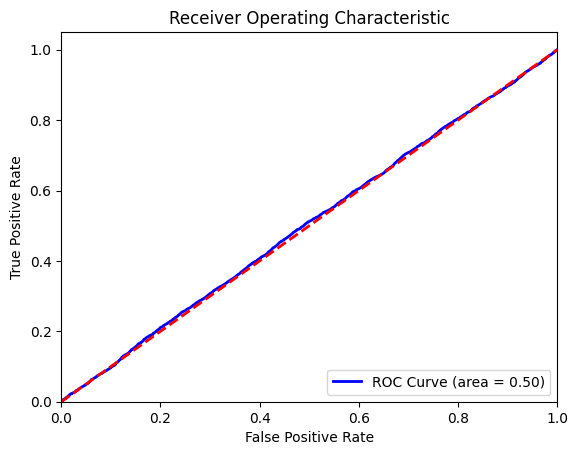

In [14]:
evaluate_model(linear_svm_model, X_test, y_test)

### Random Forest

#### Scratch

In [23]:
class RandomForestClassifierFromScratch:
    def __init__(self, max_feature=None, n_trees=100, min_sample_split=2, min_impurity=1e-7, max_depth=10, criterion='gini'):
        # Initialize the trees.
        self.trees = []
        for _ in range(n_trees):
            self.trees.append(DecisionTreeClassifierFromScratch(min_sample_split=min_sample_split, min_impurity=min_impurity,
                                                                max_depth=max_depth, criterion=criterion))

        self.tree_feature_indexes = []
        # Number of trees/estimetors.
        self.n_estimators = n_trees
        # How many features can be used for a tree from the whole features.
        self.max_features = max_feature
        # Aggication function to find the prediction.
        self.prediction_aggrigation_calculation = self._maximum_vote_calculation

    def _maximum_vote_calculation(self, y_preds):
        # Find which prediction class has higest frequency in all tree prediction for each sample.
        # create a empty array to store the prediction.
        y_pred = np.empty((y_preds.shape[0], 1))
        # iterate over all the data samples.
        for i, sample_predictions in enumerate(y_preds):
            y_pred[i] = np.bincount(sample_predictions.astype('int')).argmax()

        return y_pred

    def _make_random_subset(self, X, y, n_subsets, replacement=True):
        # Create a random subset of dataset with/without replacement.
        subset = []
        # use 100% of data when replacement is true , use 50% otherwise.
        sample_size = (X.shape[0] if replacement else (X.shape[0] // 2))

        # Add y as last column of X
        Xy = np.column_stack((X, y))
        np.random.shuffle(Xy)
        # Select randome subset of data with replacement.
        for i in range(n_subsets):
            index = np.random.choice(range(sample_size), size=np.shape(
                range(sample_size)), replace=replacement)
            X = Xy[index][:, :-1]
            y = Xy[index][:, -1]
            subset.append({"X": X, "y": y})
        return subset

    def fit(self, X, y):
        # if the max_features is not given then select it as square root of no on feature availabe.
        n_features = X.shape[1]
        if self.max_features == None:
            self.max_features = int(round(np.sqrt(n_features)))

        # Split the dataset into number of subsets equal to n_estimators.
        subsets = self._make_random_subset(X, y, self.n_estimators)

        for i, subset in enumerate(subsets):
            X_subset, y_subset = subset["X"], subset["y"]
            # select a random sucset of features for each tree. This is called feature bagging.
            idx = np.random.choice(
                range(n_features), size=self.max_features, replace=True)
            # track this for prediction.
            self.tree_feature_indexes.append(idx)
            # Get the X with the selected features only.
            X_subset = X_subset[:, idx]

            # change the y_subet to i dimentional array.
            y_subset = np.expand_dims(y_subset, axis=1)
            # build the model with selected features and selected random subset from dataset.
            self.trees[i].fit(X_subset, y_subset)

    def predict(self, test_X):
        y_preds = np.empty((test_X.shape[0], self.n_estimators))
        # find the prediction from each tree for each samples
        for i, tree in enumerate(self.trees):
            features_index = self.tree_feature_indexes[i]
            X_selected_features = test_X[:, features_index]
            if isinstance(tree, DecisionTreeClassifier):
                y_preds[:, i] = tree.predict(
                    X_selected_features).reshape((-1,))
            else:
                y_preds[:, i] = tree.predict(X_selected_features)
        # find the aggregated output.
        y_pred = self.prediction_aggrigation_calculation(y_preds)

        return y_pred

#### Scikit

In [24]:
# 3. Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
print("Random Forest Report:\n", classification_report(y_test, y_pred_rf))
joblib.dump(rf_model, 'models/random_forest_model.pkl')

Random Forest Report:
               precision    recall  f1-score   support

           0       0.97      0.98      0.97     92657
           1       0.74      0.66      0.70      8114

    accuracy                           0.95    100771
   macro avg       0.85      0.82      0.84    100771
weighted avg       0.95      0.95      0.95    100771



['models/random_forest_model.pkl']

Confusion Matrix:
 [[90762  1895]
 [ 2778  5336]]
Accuracy: 0.9536
Precision: 0.7379
Sensitivity (Recall): 0.6576
Specificity: 0.9795
F1 Score: 0.6955
AUC: 0.9514


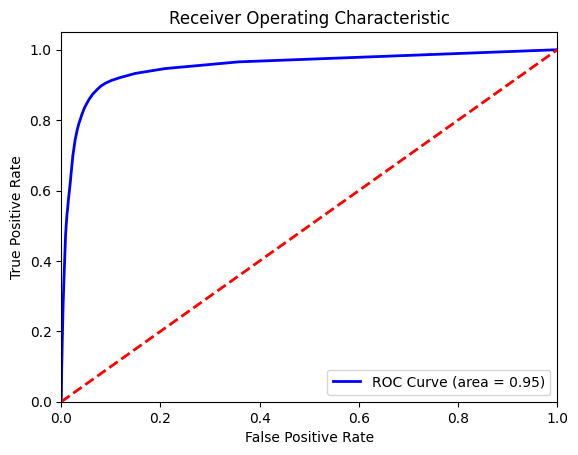

In [25]:
evaluate_model(rf_model, X_test, y_test)

### PCA

In [18]:
def plot_variance_ratio(pca):
    plt.plot(range(1, len(pca.explained_variance_ratio_) + 1),
             np.cumsum(pca.explained_variance_ratio_),
             linestyle='-', marker='o')
    plt.grid(linestyle='-', linewidth=1)
    plt.xlim([0, 22])
    plt.ylim([0, 1])

    yticks = np.arange(0, 1.1, 0.1)
    plt.yticks(yticks)

    xticks = np.arange(0, X.shape[1]+1, 1)
    plt.xticks(xticks)

    plt.xlabel('Number of components')
    plt.ylabel('Cumulative explained variance')
    plt.show()

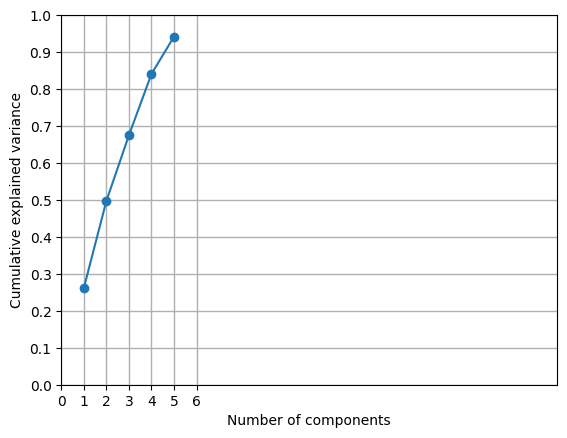

In [19]:
# 5. Dimensionality Reduction using PCA for Random Forest
pca = PCA(n_components=5)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
plot_variance_ratio(pca)

#### SVC

In [20]:
# # 6. Dimensionality Reduction using PCA for SVM
linear_svm_model_pca = LinearSVC(C=1, loss="hinge")
linear_svm_model_pca.fit(X_train_pca, y_train)
y_pred_svm_pca = linear_svm_model_pca.predict(X_test_pca)
print("Support Vector Machine with PCA Report:\n",
      classification_report(y_test, y_pred_svm_pca))
joblib.dump(linear_svm_model_pca, 'models/linear_svm_pca_model.pkl')

c:\Tools\anaconda3\envs\Intro-Data\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Tools\anaconda3\envs\Intro-Data\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Support Vector Machine with PCA Report:
               precision    recall  f1-score   support

           0       0.92      1.00      0.96     92657
           1       0.00      0.00      0.00      8114

    accuracy                           0.92    100771
   macro avg       0.46      0.50      0.48    100771
weighted avg       0.85      0.92      0.88    100771



c:\Tools\anaconda3\envs\Intro-Data\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


['models/linear_svm_pca_model.pkl']

c:\Tools\anaconda3\envs\Intro-Data\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\sunsu\AppData\Local\Temp\ipykernel_31556\1788327781.py:24: RuntimeWarning: invalid value encountered in scalar divide
  f1 = 2 * (precision * sensitivity) / (precision + sensitivity)


Confusion Matrix:
 [[92657     0]
 [ 8114     0]]
Accuracy: 0.9195
Precision: 0.0000
Sensitivity (Recall): 0.0000
Specificity: 1.0000
F1 Score: nan
AUC: 0.5085


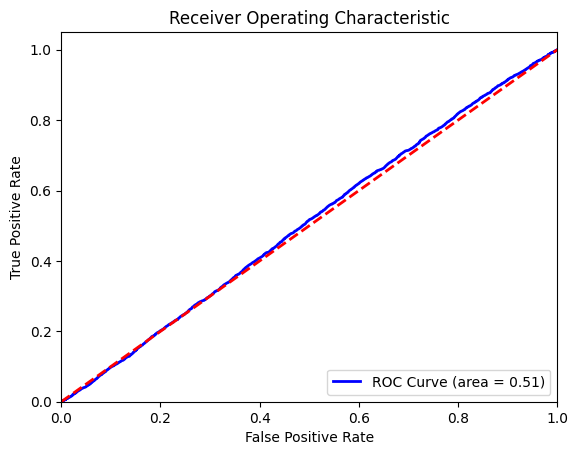

In [22]:
evaluate_model(linear_svm_model_pca, X_test_pca, y_test)

#### Random Forest

In [30]:
rf_model_pca = RandomForestClassifier()
rf_model_pca.fit(X_train_pca, y_train)
y_pred_rf_pca = rf_model_pca.predict(X_test_pca)
print("Random Forest with PCA Report:\n",
      classification_report(y_test, y_pred_rf_pca))
joblib.dump(rf_model_pca, 'models/random_forest_pca_model.pkl')

Random Forest with PCA Report:
               precision    recall  f1-score   support

           0       0.97      0.98      0.97     92657
           1       0.73      0.61      0.67      8114

    accuracy                           0.95    100771
   macro avg       0.85      0.79      0.82    100771
weighted avg       0.95      0.95      0.95    100771



['models/random_forest_pca_model.pkl']

Confusion Matrix:
 [[90853  1804]
 [ 3170  4944]]
Accuracy: 0.9506
Precision: 0.7327
Sensitivity (Recall): 0.6093
Specificity: 0.9805
F1 Score: 0.6653
AUC: 0.9468


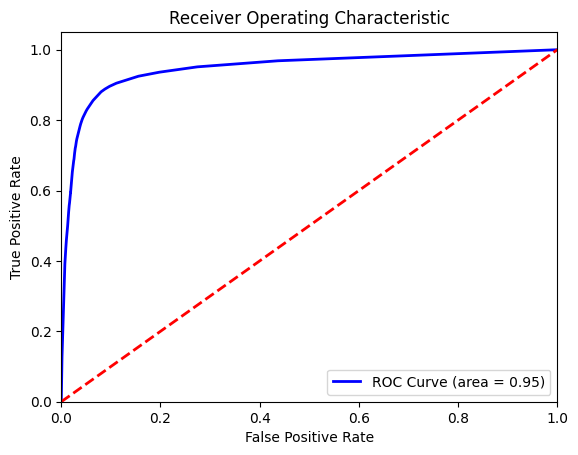

In [31]:
evaluate_model(rf_model_pca, X_test_pca, y_test)

### K-Means

#### Scratch

In [32]:
# First, we will create a helper function to calculate the Euclidean distance between two points.
def euclidean(point, centroid):
  return np.sqrt(np.sum((point - centroid) ** 2))

In [33]:
def showplotwithclass(sorted_x, centroids):
    plt.figure(figsize=(9, 3.5))

    colors = plt.cm.tab20.colors

    for i, cluster_points in enumerate(sorted_x):
        if len(cluster_points) == 0:  # Skip empty clusters
            continue
        cluster_points = np.array(cluster_points)
        plt.plot(cluster_points[:, 0], cluster_points[:, 1],
                 marker='o', linestyle='', color=colors[i % len(colors)],
                 label=f"Class {i + 1} instances")

    plt.plot([x for x, _ in centroids],
             [y for _, y in centroids],
             'k+', markersize=10, label="Centroids")

    plt.xlabel("Petal length", fontsize=10)
    plt.ylabel("Petal width", fontsize=10)
    plt.legend(fontsize=10)
    plt.show()

In [34]:
def calculateClass(X, centroids, n_clusters):
    sorted_x = [[] for _ in range(n_clusters)]  # Independent lists
    for x in X:
        dists = [euclidean(x, centroid) for centroid in centroids]
        centroid_idx = np.argmin(dists)
        sorted_x[centroid_idx].append(x)

    sorted_x = [np.array(cluster) for cluster in sorted_x]

    showplotwithclass(sorted_x, centroids)
    return sorted_x

In [35]:
def adjustCentroid(sorted_x, centroids):
    prev_centroids = centroids
    centroids = [np.mean(cluster, axis=0) for cluster in sorted_x]
    for i, centroid in enumerate(centroids):
        # Catch any np.nans, resulting from a centroid having no points
        if np.isnan(centroid).any():
            centroids[i] = prev_centroids[i]

    showplotwithclass(sorted_x, centroids)
    return centroids

In [36]:
from numpy.random import uniform

def random_forest_train(X, n_clusters):
    minpoint, maxpoint = np.min(X[:, :], axis=0), np.max(X[:, :], axis=0)
    centroids = np.array([uniform(low=minpoint, high=maxpoint)
                         for _ in range(n_clusters)])
    while True:
        sorted_x = calculateClass(X, centroids, n_clusters)
        new_centroid = adjustCentroid(sorted_x, centroids)
        if np.allclose(centroids, new_centroid):
            break
        centroids = new_centroid

#### Scikit

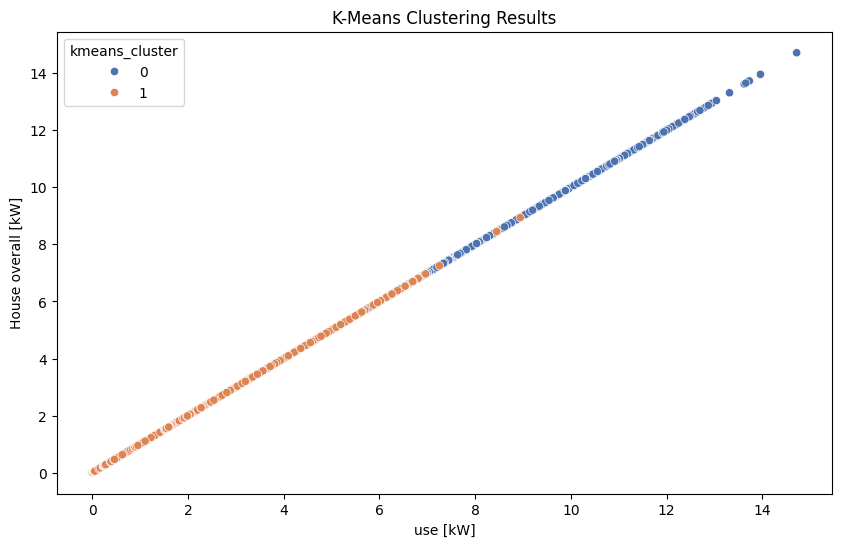

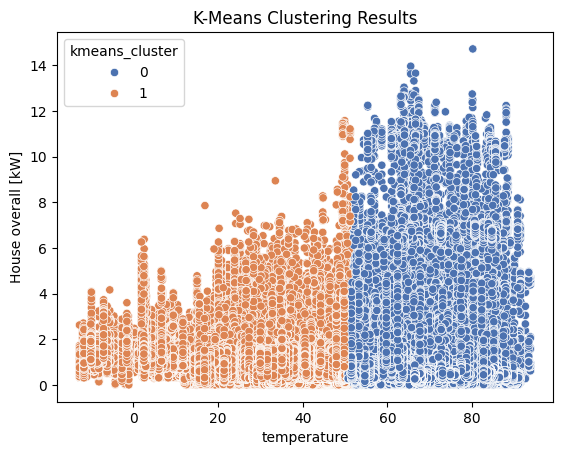

c:\Tools\anaconda3\envs\Intro-Data\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


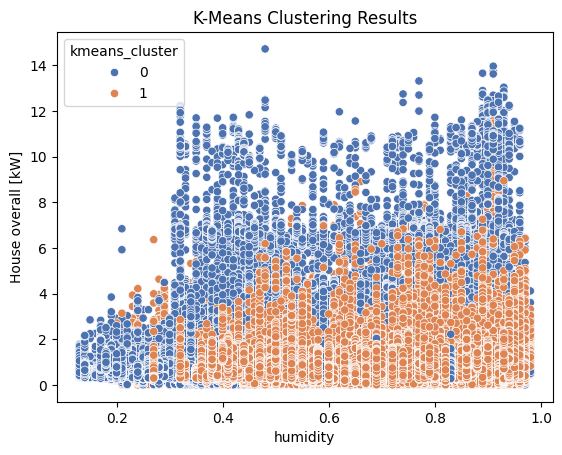

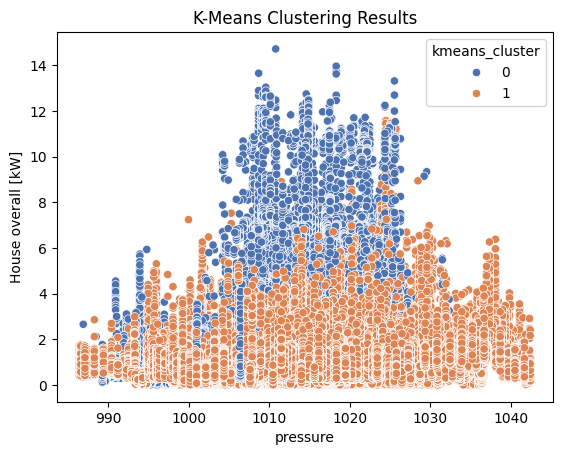

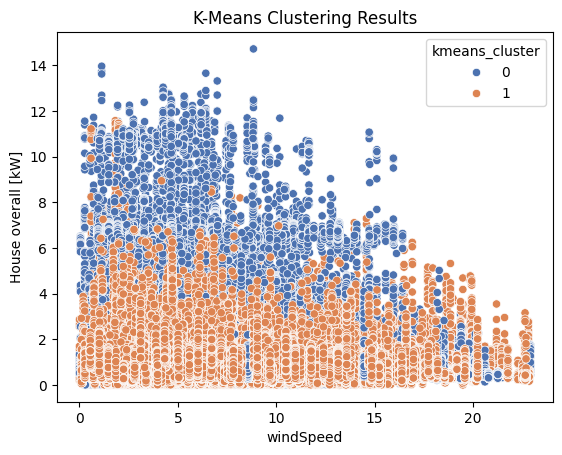

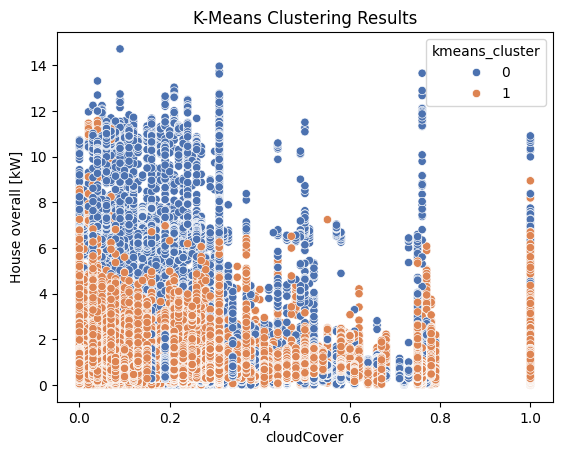

In [37]:
# 7. K-Means Clustering (Unsupervised)
kmeans = KMeans(n_clusters=2)
df['kmeans_cluster'] = kmeans.fit_predict(X)

# Plot K-Means clustering results
plt.figure(figsize=(10, 6))
for feature in X.columns:
    sns.scatterplot(x=df[feature], y=df['House overall [kW]'],
                hue=df['kmeans_cluster'], palette='deep')
    plt.title('K-Means Clustering Results')
    plt.show()

### Agglomerative Clustering

#### Scratch

In [38]:
class AgglomerativeClusteringScratch:
    def __init__(self, n_clusters=None, linkage='average'):
        # Use euclidean matric for computing pairwise distance matrix
        self.n_clusters = n_clusters

        if linkage == 'complete':
            self.linkage_distance_func = self.max_linkage_distance
        elif linkage == 'single':
            self.linkage_distance_func = self.min_linkage_distance
        else:
            self.linkage_distance_func = self.avg_linkage_distance

    def avg_linkage_distance(self, cluster_A, cluster_B):
        # Compute average linkage distance between two clusters
        distance = 0
        for i in range(cluster_A.shape[0]):
            distance += np.linalg.norm(cluster_B -
                                       cluster_A[i, :], axis=1).sum()
        distance /= (cluster_A.shape[0] * cluster_B.shape[0])
        return distance

    def max_linkage_distance(self, cluster_A, cluster_B):
        # Compute maximum linkage distance between two clusters
        distance = 0
        for i in range(cluster_A.shape[0]):
            distance = np.append(np.linalg.norm(
                cluster_B - cluster_A[i, :], axis=1), distance).max()
        return distance

    def min_linkage_distance(self, cluster_A, cluster_B):
        # Compute minimum linkage distance between two clusters
        distance = np.inf
        for i in range(cluster_A.shape[0]):
            distance = np.append(np.linalg.norm(
                cluster_B - cluster_A[i, :], axis=1), distance).min()
        return distance

    def pairwise_distance(self, data, n_samples):
        # Compute the pairwise distance matrix in euclidean matric
        distance_mat = np.zeros((n_samples, n_samples))
        for i in range(n_samples):
            for j in range(i + 1, n_samples):
                distance = np.linalg.norm(data[i] - data[j])
                distance_mat[i, j] = distance
                distance_mat[j, i] = distance
        return distance_mat

    def update(self, data, distance_mat, labels):
        # "Find closest clusters, merge clusters, delete cluster, update distance"
        # Index of upper part of distance matrix (skip diagonal)
        idx_upper = np.triu_indices(distance_mat.shape[0], k=1)
        min_value = np.min(distance_mat[idx_upper])  # Value of idx_upper
        row, col = np.argwhere(distance_mat == min_value)[
            0]  # Index of min_value (same as d_kl)

        # Update label
        labels[labels == col] = row
        labels[labels > col] -= 1

        # Deleted the row and column 'col'
        distance_mat = np.delete(distance_mat, col, 0)
        distance_mat = np.delete(distance_mat, col, 1)

        # Update distance matrix
        for i in range(len(distance_mat)):
            distance_mat[row, i] = self.linkage_distance_func(
                data[labels == row], data[labels == i])
            distance_mat[i, row] = distance_mat[row, i]
        return distance_mat, labels

    def fit_predict(self, X):
        self.data = X
        self.n_samples = self.data.shape[0]
        self.initial_distance = self.pairwise_distance(
            self.data, self.n_samples)
        self.labels = np.arange(self.n_samples)
        self.distance_matrix = self.initial_distance.copy()
        while len(np.unique(self.labels)) > self.n_clusters:
            # Fill in the diagonal as infinity to determine that the distance is the same position.
            np.fill_diagonal(self.distance_matrix, np.inf)
            self.distance_matrix, self.labels = self.update(
                self.data, self.distance_matrix, self.labels)

        return self.labels

#### Scikit

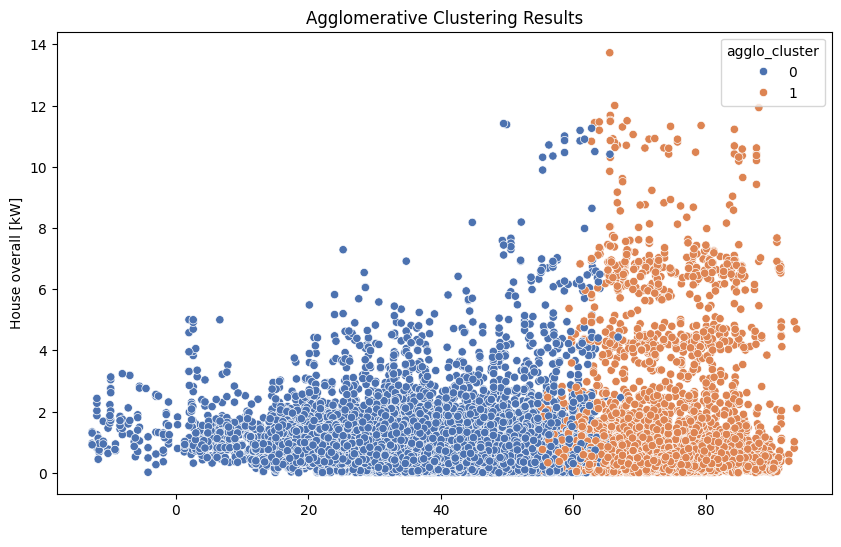

In [39]:
# 8. Agglomerative Clustering (Unsupervised)
df_sampled = df.sample(n=30000, random_state=42)
X_sampled = df_sampled[X.columns]

agglo = AgglomerativeClustering(n_clusters=2)
df_sampled['agglo_cluster'] = agglo.fit_predict(X_sampled)

# Plot Agglomerative Clustering results
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_sampled['temperature'], y=df_sampled['House overall [kW]'],
                hue=df_sampled['agglo_cluster'], palette='deep')
plt.title('Agglomerative Clustering Results')
plt.show()

### Neural Network

#### Scratch

In [40]:
class Neuron:
    def __init__(self, input_dim, output_dim, activation=None):
        # Generate weight with shape INPUT x OUTPUT (in this case 11 x 5 for the first part and 5 x 2 for the second part)
        self.W = np.random.randn(input_dim, output_dim)
        # Generate bias in the same shape as the output
        self.b = np.random.randn(1, output_dim)
        self.activation = activation

    def forward(self, X):
        self.X = X
        # Input(1 x X) • Weight (X x Y) => Output (1 x Y)
        self.Z = np.dot(X, self.W)
        self.Z += self.b  # Add bias to the output
        # Pass the output to the activation function if we have it
        if self.activation:
            self.A = self.activation.forward(self.Z)
        else:
            self.A = self.Z
        return self.A

    def backward(self, dA):
        # Calculate gradient according to loss received by backward propagation
        if self.activation:
            dZ = self.activation.backward(self.Z, dA)
        else:
            dZ = dA
        dW = np.dot(self.X.T, dZ)
        db = np.sum(dZ, axis=0, keepdims=True)
        dX = np.dot(dZ, self.W.T)
        return dW, db, dX


class NeuralModel:
    def __init__(self, layers_dim, activations):
        self.layers = []
        input_dim = layers_dim[0]
        for output_dim, activation in zip(layers_dim[:-1], activations[:-1]):
            self.layers.append(
                Neuron(input_dim, output_dim, activation=activation))
            input_dim = output_dim
        # Last layer activation
        self.layers.append(
            Neuron(input_dim, layers_dim[-1], activation=activations[-1]))
        self.loss = []

    def calculate_loss(self, X, y):
        # Calculate loss from true result compare the the predicted value
        mse_loss = np.mean((self.predict(X) - y) ** 2)
        return mse_loss

    def predict(self, X):
        # Pass the input into hidden layers and propagate forward in neural network
        input = X
        for layer in self.layers:
            input = layer.forward(input)
        # the result here is passed through all the hidden layers
        return input

    def train(self, X, y, num_passes=20000, learning_rate=0.01, print_loss=False):
        for epoch in range(num_passes):
            # Forward propagation
            input = X
            for layer in self.layers:
                input = layer.forward(input)

            # Calculate the loss (Mean Squared Error)
            loss = np.mean((input - y) ** 2)
            self.loss.append(loss)

            # Back propagation
            dA = 2 * (input - y) / y.size
            for layer in reversed(self.layers):
                dW, db, dA = layer.backward(dA)
                layer.W -= learning_rate * dW
                layer.b -= learning_rate * db

            if print_loss and epoch % 1000 == 0:
                print(f"Loss after iteration {epoch}: {loss:.6f}")

# Activation functions
class ReLU:
    @staticmethod
    def forward(Z):
        return np.maximum(0, Z)

    @staticmethod
    def backward(Z, dA):
        return dA * (Z > 0)


class Sigmoid:
    @staticmethod
    def forward(Z):
        return 1 / (1 + np.exp(-Z))

    @staticmethod
    def backward(Z, dA):
        A = Sigmoid.forward(Z)
        return dA * A * (1 - A)

In [41]:
import torch
import torch.optim as optim
import torch.nn as nn

# Convert data to PyTorch tensors
X_train_tensor = torch.FloatTensor(X_train)
y_train_tensor = torch.FloatTensor(y_train.values).view(-1, 1)
X_test_tensor = torch.FloatTensor(X_test)
y_test_tensor = torch.FloatTensor(y_test.values).view(-1, 1)

In [42]:
# Define Single-Layer Perceptron (SLP) Model
class SLP(nn.Module):
    def __init__(self, input_size):
        super(SLP, self).__init__()
        self.linear = nn.Linear(input_size, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        out = self.linear(x)
        return self.sigmoid(out)

In [43]:
# Define Multi-Layer Perceptron (MLP) Model

class MLP(nn.Module):
    def __init__(self, input_size):
        super(MLP, self).__init__()
        self.hidden = nn.Linear(input_size, 10)  # Hidden layer with 10 neurons
        self.output = nn.Linear(10, 1)            # Output layer
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        hidden_out = self.hidden(x)
        hidden_out = torch.relu(hidden_out)      # ReLU activation
        out = self.output(hidden_out)
        return self.sigmoid(out)


In [44]:
# Instantiate models
input_size = X_train.shape[1]
slp_model = SLP(input_size)
mlp_model = MLP(input_size)

# Define loss function and optimizer
criterion = nn.BCELoss()  # Binary Cross-Entropy Loss
slp_optimizer = optim.Adam(slp_model.parameters(), lr=0.01)
mlp_optimizer = optim.Adam(mlp_model.parameters(), lr=0.01)

In [45]:
# Training Function


def train_model(model, optimizer, X_train, y_train, epochs=100):
    model.train()  # Set the model to training mode
    for epoch in range(epochs):
        optimizer.zero_grad()  # Zero the gradients
        outputs = model(X_train)  # Forward pass
        loss = criterion(outputs, y_train)  # Compute loss
        loss.backward()  # Backward pass
        optimizer.step()  # Update weights
        if (epoch+1) % 10 == 0:
            print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')


# Train SLP Model
print("Training Single-Layer Perceptron (SLP):")
train_model(slp_model, slp_optimizer, X_train_tensor, y_train_tensor)

# Train MLP Model
print("Training Multi-Layer Perceptron (MLP):")
train_model(mlp_model, mlp_optimizer, X_train_tensor, y_train_tensor)

Training Single-Layer Perceptron (SLP):
Epoch [10/100], Loss: 0.6603
Epoch [20/100], Loss: 0.6127
Epoch [30/100], Loss: 0.5750
Epoch [40/100], Loss: 0.5422
Epoch [50/100], Loss: 0.5130
Epoch [60/100], Loss: 0.4874
Epoch [70/100], Loss: 0.4644
Epoch [80/100], Loss: 0.4438
Epoch [90/100], Loss: 0.4255
Epoch [100/100], Loss: 0.4091
Training Multi-Layer Perceptron (MLP):
Epoch [10/100], Loss: 0.7288
Epoch [20/100], Loss: 0.5692
Epoch [30/100], Loss: 0.4550
Epoch [40/100], Loss: 0.3614
Epoch [50/100], Loss: 0.2998
Epoch [60/100], Loss: 0.2756
Epoch [70/100], Loss: 0.2706
Epoch [80/100], Loss: 0.2693
Epoch [90/100], Loss: 0.2678
Epoch [100/100], Loss: 0.2663


In [48]:
def evaluate_nn_model(model, X_test, y_test):
    model.eval()  # Set the model to evaluation mode
    with torch.no_grad():  # Disable gradient computation
        y_pred = model(X_test)  # Forward pass
        # Convert probabilities to binary
        y_pred_classes = (y_pred >= 0.5).float()
    return y_pred_classes

In [49]:
# Evaluate SLP Model
y_pred_slp = evaluate_nn_model(slp_model, X_test_tensor, y_test_tensor)
print("SLP Classification Report:\n",
      classification_report(y_test, y_pred_slp.numpy()))

SLP Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.99      0.95     92657
           1       0.28      0.05      0.09      8114

    accuracy                           0.91    100771
   macro avg       0.60      0.52      0.52    100771
weighted avg       0.87      0.91      0.88    100771



In [50]:
# Evaluate MLP Model
y_pred_mlp = evaluate_nn_model(mlp_model, X_test_tensor, y_test_tensor)
print("MLP Classification Report:\n",
      classification_report(y_test, y_pred_mlp.numpy()))

MLP Classification Report:
               precision    recall  f1-score   support

           0       0.92      1.00      0.96     92657
           1       0.00      0.00      0.00      8114

    accuracy                           0.92    100771
   macro avg       0.46      0.50      0.48    100771
weighted avg       0.85      0.92      0.88    100771



c:\Tools\anaconda3\envs\Intro-Data\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Tools\anaconda3\envs\Intro-Data\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Tools\anaconda3\envs\Intro-Data\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [51]:
# After training the models, save them
torch.save(slp_model.state_dict(), 'models/slp_model.pth')
print("Single-Layer Perceptron model saved as 'models/slp_model.pth'")

torch.save(mlp_model.state_dict(), 'models/mlp_model.pth')
print("Multi-Layer Perceptron model saved as 'models/mlp_model.pth'")

Single-Layer Perceptron model saved as 'models/slp_model.pth'
Multi-Layer Perceptron model saved as 'models/mlp_model.pth'
